In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [123]:
traindata=pd.read_csv('Train.csv')
traindata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [124]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [125]:
traindata.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [126]:
traindata.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [127]:
#handling the NA values
traindata['Gender'] = traindata['Gender'].fillna(traindata['Gender'].value_counts().index[0])
traindata['Married'] = traindata['Married'].fillna(traindata['Married'].value_counts().index[0])
traindata['Dependents']=traindata['Dependents'].fillna(traindata['Dependents'].value_counts().index[0])
traindata['Self_Employed']=traindata['Self_Employed'].fillna(traindata['Self_Employed'].value_counts().index[0])
traindata['LoanAmount'] = traindata['LoanAmount'].fillna(traindata['LoanAmount'].mean())
traindata['Loan_Amount_Term']=traindata['Loan_Amount_Term'].fillna(traindata['Loan_Amount_Term'].mean())
traindata['Credit_History']=traindata['Credit_History'].fillna(traindata['Credit_History'].mean())

In [128]:
traindata.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [129]:
#handling the categorical records
traindata['Gender']=pd.get_dummies(traindata['Gender'])
traindata['Married']=pd.get_dummies(traindata['Married'])
traindata['Dependents']=pd.get_dummies(traindata['Dependents'])
traindata['Education']=pd.get_dummies(traindata['Education'])
traindata['Self_Employed']=pd.get_dummies(traindata['Self_Employed'])
traindata['Property_Area']=pd.get_dummies(traindata['Property_Area'])
traindata['Loan_Status']=pd.get_dummies(traindata['Loan_Status'])

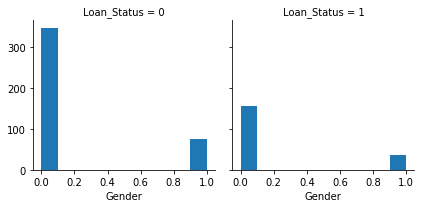

In [130]:
#visualization
grid = sns.FacetGrid(traindata, col='Loan_Status')
grid.map(plt.hist, 'Gender')

In [131]:
traindata.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.346906,0.586319,0.781759,0.866450,5403.459283,1621.245798,146.412162,342.000000,0.842199,0.291531,0.312704
std,0.386497,0.476373,0.492894,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.454838,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000


In [132]:
traindata=traindata.drop('Loan_ID',axis=1)
x=traindata.drop('Loan_Status',axis=1)
y=traindata['Loan_Status']
traindata

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,1,5849,0.0,146.412162,360.0,1.0,0,0
1,0,0,0,1,1,4583,1508.0,128.000000,360.0,1.0,1,1
2,0,0,1,1,0,3000,0.0,66.000000,360.0,1.0,0,0
3,0,0,1,0,1,2583,2358.0,120.000000,360.0,1.0,0,0
4,0,1,1,1,1,6000,0.0,141.000000,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,1,1,1,2900,0.0,71.000000,360.0,1.0,1,0
610,0,0,0,1,1,4106,0.0,40.000000,180.0,1.0,1,0
611,0,0,0,1,1,8072,240.0,253.000000,360.0,1.0,0,0
612,0,0,0,1,1,7583,0.0,187.000000,360.0,1.0,0,0


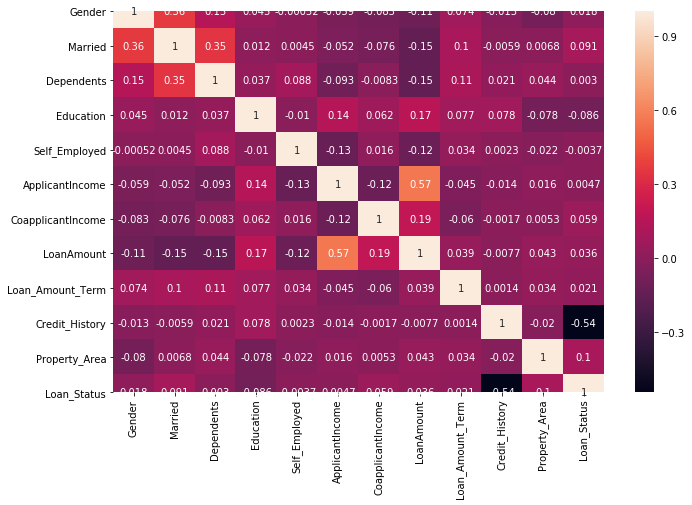

In [113]:
data_corr = pd.concat([x, y], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(11,7))
sns.heatmap(corr, annot=True)

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [115]:
createModel=LogisticRegression()
createModel.fit(x_train,y_train)

C:\Users\gautam.y.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
#saving the training data into picklefile
import pickle
pickle.dump(createModel, open('mymodel.pkl','wb'))
model = pickle.load(open('mymodel.pkl','rb'))

In [98]:
y_test

454    0
52     1
536    0
469    1
55     0
      ..
242    0
515    0
582    0
225    1
134    0
Name: Loan_Status, Length: 185, dtype: uint8

In [99]:
createModel.predict(x_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [100]:
score=createModel.score(x_test,y_test)

In [101]:
score

0.8324324324324325